<a href="https://colab.research.google.com/github/acubillosde/UNAL-Herramientas-Visualizacion/blob/main/07-An%C3%A1lisis_Series_Tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Recuerda que una vez abierto, Da clic en "Copiar en Drive", de lo contrario no podras almancenar tu progreso**

Nota: no olvide ir ejecutando las celdas de código de arriba hacia abajo para que no tenga errores de importación de librerías o por falta de definición de variables.

In [45]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/acubillosde/UNAL-Herramientas-Visualizacion/main/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

# **Series de Tiempo**

Una serie temporal es una colección de puntos de datos que se almacenan con respecto a su tiempo. El análisis matemático y estadístico realizado en este tipo de datos para encontrar patrones ocultos e información significativa se denomina análisis de series temporales. Las técnicas de modelado de series temporales se utilizan para comprender patrones pasados ​​a partir de los datos y tratar de pronosticar horizontes futuros. Estas técnicas y metodologías han ido evolucionando durante décadas.

Las observaciones con marcas de tiempo continuas y variables objetivo a veces se enmarcan como problemas de regresión sencillos al descomponer las fechas en minutos, horas, días, semanas, meses, años, etc., que no es la forma correcta de manejar dichos datos porque los resultados obtenidos son deficientes. . En este capítulo, aprenderá el enfoque correcto para manejar datos de series de tiempo.

Hay diferentes tipos de datos, como estructurados, semiestructurados y no estructurados, y cada tipo debe manejarse a su manera para obtener el máximo conocimiento. Vamos a ver datos de series de tiempo que están estructurados de manera tal como datos del mercado de valores, el clima, las tasas de natalidad, el tráfico, las aplicaciones para compartir bicicletas, etc.

Creemos nuestra primera serie de tiempo

In [52]:
import pandas as pd
from datetime import datetime

# Creamos el rango de datos
seven_days = pd.date_range(start = '2017-1-1', periods = 7, freq = 'd')
seven_days
# Iteramos sobre los datos e imprimimos el número y el nombre de la semana.
for day in seven_days:
    print(day.dayofweek, day.day_name())


6 Sunday
0 Monday
1 Tuesday
2 Wednesday
3 Thursday
4 Friday
5 Saturday


Ahora vamos convertir una columna a un tipo de dato-tiempo. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6317 entries, 0 to 6316
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6317 non-null   object 
 1   ozone   6317 non-null   float64
 2   pm25    6317 non-null   float64
 3   co      6317 non-null   float64
dtypes: float64(3), object(1)
memory usage: 197.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6317 entries, 1999-07-01 to 2017-03-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ozone   6317 non-null   float64
 1   pm25    6317 non-null   float64
 2   co      6317 non-null   float64
dtypes: float64(3)
memory usage: 197.4 KB
None


/home/alfonso/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/__init__.py:71: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


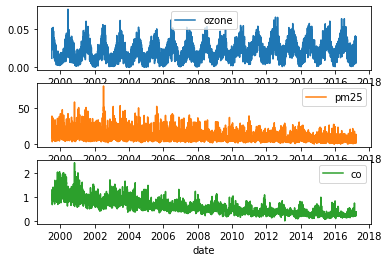

In [54]:
data = pd.read_csv('local/data/nyc.csv')

# Inspect data
print(data.info())

# Convert the date column to datetime64
data['date'] = pd.to_datetime(data['date'])

# Set date column as index

data.set_index('date', inplace = True)
# Inspect data 
print(data.info())

# Plot data
fig, ax = plt.subplots()
data.plot(ax = ax, subplots = True, layout = (3, 1))
plt.show()

In [60]:
yahoo = pd.read_csv('local/data/yahoo.csv')
yahoo


,date,price
0,2013-01-02,20.08
1,2013-01-03,19.78
2,2013-01-04,19.86
3,2013-01-07,19.40
4,2013-01-08,19.66
...,...,...
777,2015-12-25,NaN
778,2015-12-28,33.60
779,2015-12-29,34.04
780,2015-12-30,33.37


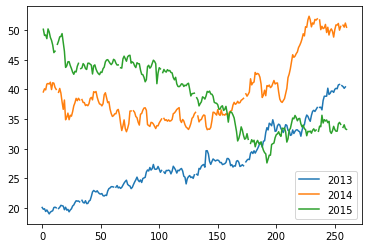

In [63]:
yahoo = pd.read_csv('local/data/yahoo.csv')
yahoo['date'] = pd.to_datetime(yahoo['date'])
yahoo.set_index('date', inplace = True)

# Create dataframe prices here
prices = pd.DataFrame()

# Select data for each year and concatenate with prices here 
for year in ['2013', '2014', '2015']:
    price_per_year = yahoo.loc[year, ['price']].reset_index(drop=True)
    price_per_year.rename(columns={'price': year}, inplace=True)
    prices = pd.concat([prices, price_per_year], axis=1)

# Plot prices
prices.plot()
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1898 entries, 2005-01-01 to 2010-12-31
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Chicago      1898 non-null   float64
 1   Los Angeles  1898 non-null   float64
 2   New York     1898 non-null   float64
dtypes: float64(3)
memory usage: 59.3 KB
None


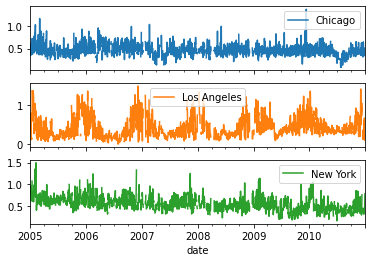

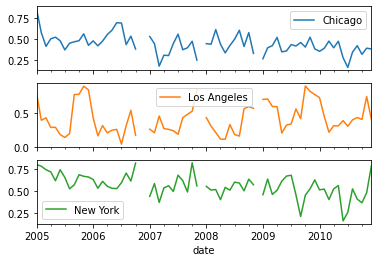

In [65]:
co = pd.read_csv('local/data/co_cities.csv')
co['date'] = pd.to_datetime(co['date'])
co.set_index('date', inplace = True)

# Inspect data
print(co.info())

# Set data # set the frequency to calendar daily
co = co.asfreq('D')

# Plot the data
co.plot(subplots=True)
plt.show()

# Set frequency to monthly
co = co.asfreq('M')

# Plot the 'close' price
co.plot(subplots=True)
plt.show()

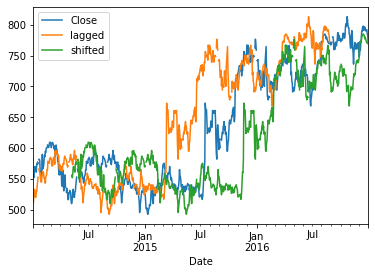

In [66]:
# Import data here
google = pd.read_csv('local/data/google.csv', parse_dates=['Date'], index_col='Date')

# Set data frequency to business daily
google = google.asfreq('B')

# Create 'lagged' and 'shifted'
google['lagged'] = google.Close.shift(periods=-90)
google['shifted'] = google.Close.shift(periods=90)

# Plot the google price series
google.plot()
plt.show()


In [67]:
# Created shifted_30 here
yahoo['shifted_30'] = yahoo.price.shift(30)

# Subtract shifted_30 from price
yahoo['change_30'] = yahoo.price.sub(yahoo.shifted_30)

# Get the 30-day price difference
yahoo['diff_30'] = yahoo.price.diff(30)

# Inspect the last five rows of price
print(yahoo.tail())

# Show the value_counts of the difference between change_30 and diff_30
print(yahoo.change_30.sub(yahoo.diff_30).value_counts())

            price  shifted_30  change_30  diff_30
date                                             
2015-12-25    NaN       32.19        NaN      NaN
2015-12-28  33.60       32.94       0.66     0.66
2015-12-29  34.04       32.86       1.18     1.18
2015-12-30  33.37       32.98       0.39     0.39
2015-12-31  33.26       32.62       0.64     0.64
0.0    703
dtype: int64


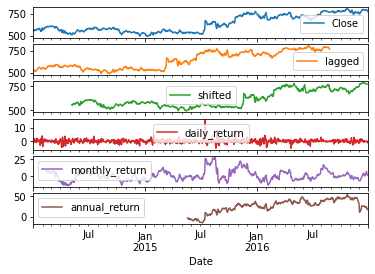

In [68]:
# Create daily_return
google['daily_return'] = google.Close.pct_change().mul(100)

# Create monthly_return
google['monthly_return'] = google.Close.pct_change(30).mul(100)

# Create annual_return
google['annual_return'] = google.Close.pct_change(360).mul(100)

# Plot the result
google.plot(subplots=True)
plt.show()

### **Estructura de las series de tiempo en Pandas**

Una serie es similar a una lista o una matriz en Python. Representa una serie de valores (numéricos o de otro tipo) como una columna de datos. Proporciona funcionalidad, métodos y operadores adicionales, lo que la convierte en una versión más potente de una lista.

In [25]:
import pandas as pd
import numpy as np
# Create a Series from a list
ser = pd.Series([1, 3])
print(ser)
# String as index
prices = {'apple': 4.99,
'banana': 1.99,
'orange': 3.99}
ser = pd.Series(prices)
print(ser)
x = pd.Series(np.arange(1,3), index=[x for x in 'ab'])
print(x)
print(x['b'])


0    1
1    3
dtype: int64
apple     4.99
banana    1.99
orange    3.99
dtype: float64
a    1
b    2
dtype: int64
2


### **Análsis de series de tiempo de Google Trends**

Podemos obterner datos de Google Trends de palabras clave como "dieta" y "gimnasio" y vea cómo varían con el tiempo mientras aprende sobre tendencias y estacionalidad en datos de series temporales.

Revisaremos los datos de tendencias de Google de las palabras clave "dieta", "gimnasio" y "finanzas" para ver cómo varían con el tiempo. Nos preguntamos si podría haber más búsquedas de estos términos en enero cuando todos estamos tratando de pasar página.

A continuación vamos a

* Leer data
* Recodificar datos
* Análisis exploratorio de datos.

### **Lectura de la data**

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot appears on its own windows
%matplotlib inline
# Tools / Preferences / Ipython Console / Graphics ˓→“automatic”
# Interactive Matplotlib Jupyter Notebook
# %matplotlib inline / Graphics Backend / Backend:␣
#try:
archive = 'local/data/multiTimeline.csv'
df = pd.read_csv(archive, skiprows=2)
#except:
#    df = pd.read_csv("../multiTimeline.csv", skiprows=2)

print(df.head())
# Rename columns
df.columns = ['month', 'diet', 'gym', 'finance']
# Describe
print(df.describe())

     Month  diet: (Worldwide)  gym: (Worldwide)  finance: (Worldwide)
0  2004-01                100                31                    48
1  2004-02                 75                26                    49
2  2004-03                 67                24                    47
3  2004-04                 70                22                    48
4  2004-05                 72                22                    43
             diet         gym     finance
count  168.000000  168.000000  168.000000
mean    49.642857   34.690476   47.148810
std      8.033080    8.134316    4.972547
min     34.000000   22.000000   38.000000
25%     44.000000   28.000000   44.000000
50%     48.500000   32.500000   46.000000
75%     53.000000   41.000000   50.000000
max    100.000000   58.000000   73.000000


### **Recodificación de los datos**

A continuación, convertiremos la columna "mes" en un tipo de datos DateTime y la convertiremos en el índice del DataFrame.

Se debe tener en cuenta que se hace esto porque vio en el resultado del método .info() que la columna 'Mes' era en realidad un objeto de tipo de datos. Ahora, ese tipo de datos genérico encapsula todo, desde cadenas hasta números enteros, etc. Eso no es exactamente lo que quiere cuando quiere ver datos de series temporales. Es por eso que usará .to_datetime() para convertir la columna 'mes' en su DataFrame a DateTime.

In [39]:
df['month'] = pd.to_datetime(df['month'])
df.set_index('month', inplace=True)
print(df.head())

            diet  gym  finance
month                         
2004-01-01   100   31       48
2004-02-01    75   26       49
2004-03-01    67   24       47
2004-04-01    70   22       48
2004-05-01    72   22       43


### **Análisis de datos exploratorios**

Puede usar un método de visualización de pandas incorporado .plot() para trazar sus datos como gráficos de 3 líneas en una sola figura (uno para cada columna, a saber, 'dieta', 'gimnasio' y 'finanzas').

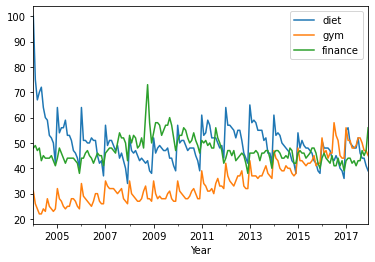

In [36]:
df.plot()
plt.xlabel('Year');

Tenga en cuenta que estos datos son relativos. Como puedes leer en Google Trends:

Los números representan el interés de búsqueda en relación con el punto más alto del gráfico para la región y el tiempo determinados. Un valor de 100 es el pico de popularidad del término. Un valor de 50 significa que el término es la mitad de popular. Del mismo modo, una puntuación de 0 significa que el término fue menos del 1% tan popular como el pico.

### **Remuestreo, Suavizado, Ventanas, Promedio móvil: Tendencias**

Promedio móvil, para cada punto de tiempo, tome el promedio de los puntos a cada lado. Tenga en cuenta que el número de puntos se especifica por un tamaño de ventana.

Eliminar la estacionalidad con la serie pandas.

Ver: http://pandas.pydata.org/pandas-docs/stable/timeseries.html A: ‘year end frequency’
year frequency

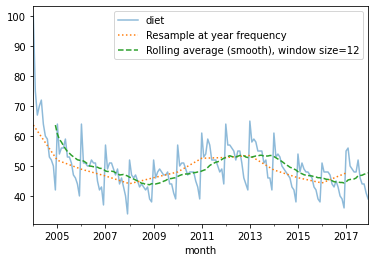

In [9]:
diet = df['diet']
diet_resamp_yr = diet.resample('A').mean()
diet_roll_yr = diet.rolling(12).mean()
ax = diet.plot(alpha=0.5, style='-') # store axis (ax) for latter plots
diet_resamp_yr.plot(style=':', label='Resample at year frequency', ax=ax)
diet_roll_yr.plot(style='--', label='Rolling average (smooth), window size=12', ax=ax)
ax.legend()

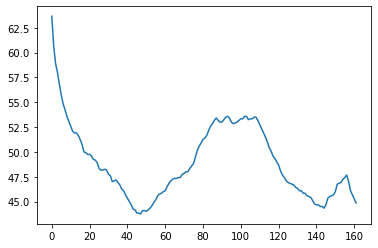

In [11]:
x = np.asarray(df[['diet']])
win = 12

win_half = int(win / 2)
# print([((idx-win_half), (idx+win_half)) for idx in np.arange(win_half, len(x))])
diet_smooth = np.array([x[(idx-win_half):(idx+win_half)].mean() for idx in np.arange(win_half, len(x))])
plt.plot(diet_smooth)

Tendencias Dieta y Gimnasio

Cree un nuevo DataFrame que es la dieta de concatenación y los datos suavizados del gimnasio

Text(0.5, 0, 'Year')

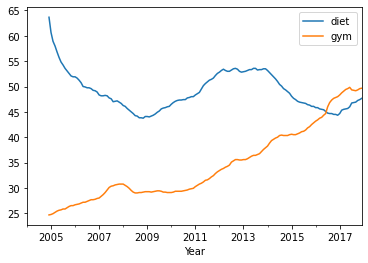

In [14]:
gym = df['gym']
df_avg = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_avg.plot()
plt.xlabel('Year')

Tendencias

Text(0.5, 0, 'Year')

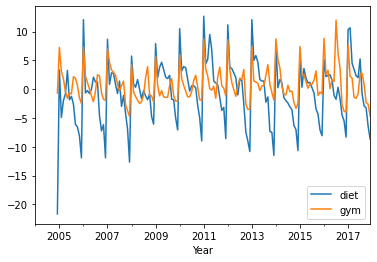

In [15]:
df_dtrend = df[["diet", "gym"]] - df_avg
df_dtrend.plot()
plt.xlabel('Year')

### **Diferenciación de primer orden: patrones estacionales**

Text(0.5, 0, 'Year')

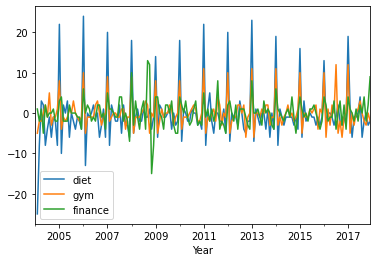

In [16]:
# diff = original - shiftted data
# (exclude first term for some implementation details)
assert np.all((diet.diff() == diet - diet.shift())[1:])
df.diff().plot()
plt.xlabel('Year')

### **Periodicidad y correlación**

             diet       gym   finance
diet     1.000000 -0.100764 -0.034639
gym     -0.100764  1.000000 -0.284279
finance -0.034639 -0.284279  1.000000


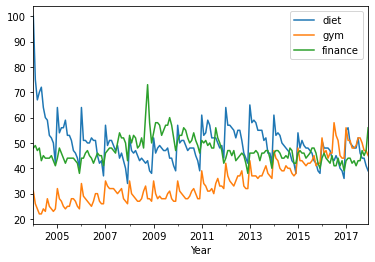

In [17]:
df.plot()
plt.xlabel('Year');
print(df.corr())

### **Gráfico de Matriz de Correlación**

<AxesSubplot:>

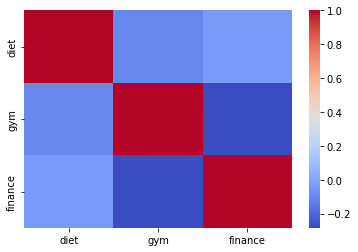

In [18]:
sns.heatmap(df.corr(), cmap="coolwarm")

¡las variables 'dieta' y 'gimnasio' están correlacionados negativamente! Recuerda que tienes un componente de temporada y otro de tendencia. Del coeficiente de correlación, 'dieta' y 'gimnasio' están negativamente correlacionados:

* los componentes de las tendencias están negativamente correlacionados.
* los componentes estacionales se correlacionarían positivamente

Correlación estacional: correlación de las diferencias de primer orden de estas series temporales

             diet       gym   finance
diet     1.000000  0.758707  0.373828
gym      0.758707  1.000000  0.301111
finance  0.373828  0.301111  1.000000


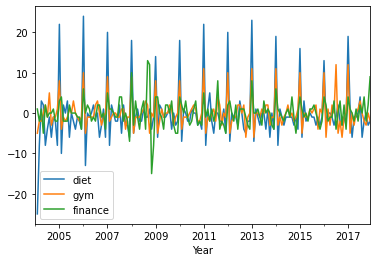

In [21]:
df.diff().plot()
plt.xlabel('Year');
print(df.diff().corr())

Gráfico de la matriz de correlación

<AxesSubplot:>

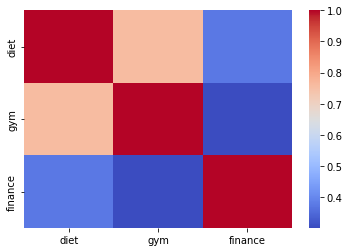

In [20]:
sns.heatmap(df.diff().corr(), cmap="coolwarm")

Descomposición de series temporales en tendencia, estacionalidad y residuos

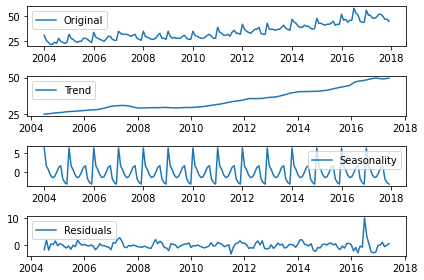

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
x = gym
x = x.astype(float) # force float
decomposition = seasonal_decompose(x)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(x, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### **Autocorrelación**

Una serie de tiempo es periódica si se repite a intervalos igualmente espaciados, por ejemplo, cada 12 meses.
Función de Autocorrelación (ACF): Es una medida de la correlación entre el TS con una versión retrasada de sí mismo.

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

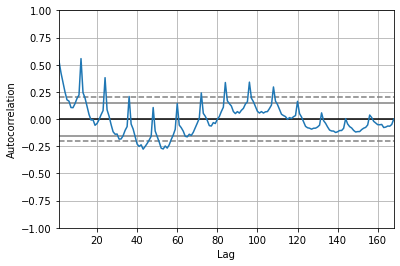

In [23]:
# from pandas.plotting import autocorrelation_plot
from pandas.plotting import autocorrelation_plot
x = df["diet"].astype(float)
autocorrelation_plot(x)

Cálculo de la función de autocorrelación.

/home/alfonso/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


Text(0.5, 1.0, 'Autocorrelation Function')

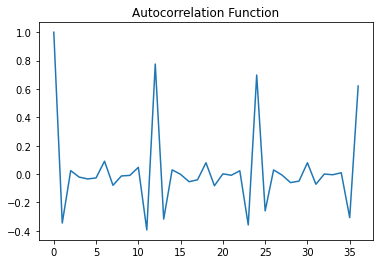

In [24]:
from statsmodels.tsa.stattools import acf
x_diff = x.diff().dropna() # first item is NA
lag_acf = acf(x_diff, nlags=36)
plt.plot(lag_acf)
plt.title('Autocorrelation Function')

## **Bibliografía**